In [1]:
from lib.BBMetrics import BBMetric
from transformers import TFAutoModelForCausalLM, AutoTokenizer
import os
from Data.data_dicts import character_dict, source_dict, random_state

import os
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    base_folder = '/content/drive/My Drive/unibo/NLP_project/BarneyBot'
    os.system("pip install datasets")
    os.system("pip install transformers")
    os.system("pip install rouge_score")
    os.system("pip install -U sentence-transformers")
else:
    base_folder = os.getcwd()

sentences1 = ["I love this! I think life is good without issues.", "The red fox jumps.", "Hi"]
sentences2 = ["I hate you.", "Hi"]

In [ ]:
model = TFAutoModelForCausalLM.from_pretrained('microsoft/DialoGPT-small', cache_dir=os.path.join(os.getcwd(), "cache"))
tokenizer = AutoTokenizer.from_pretrained('microsoft/DialoGPT-small', cache_dir=os.path.join(os.getcwd(), "cache"))
tokenizer.pad_token = '#'

In [2]:
BBMetric.metrics_list

['bleu',
 'semantic similarity',
 'rouge l',
 'emotion',
 'semantic answer similarity',
 'distinct',
 'semantic classifier',
 'perplexity',
 'human - coherence',
 'human - consistency',
 'human - style']

Loaded encoded lines from D:\University\Esami da Superare\Natural Language Processing\BarneyBot\BarneyBot\Data\Characters\Vader\vader_encoded_lines.npy
Running shuffle 0/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 8765.53it/s]


Running shuffle 1/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 6582.89it/s]


Running shuffle 2/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 5096.91it/s]


Running shuffle 3/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 4646.12it/s]


Running shuffle 4/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 5097.03it/s]


Running shuffle 5/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 6870.99it/s]


Running shuffle 6/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 8776.21it/s]


Running shuffle 7/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 8317.75it/s]


Running shuffle 8/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 7900.95it/s]


Running shuffle 9/10


100%|██████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 7901.23it/s]


Loading training data...


100%|█████████████████████████████████████████████████████████████████████████| 2686/2686 [00:00<00:00, 1352286.71it/s]


Loading test data...


100%|████████████████████████████████████████████████████████████████████████████████████████| 316/316 [00:00<?, ?it/s]


Loading validation data...


100%|████████████████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<?, ?it/s]


168/168 [==============================] - 8s 38ms/step - loss: 0.9270 - binary_accuracy: 0.5339 - recall_1: 0.5377 - val_loss: 0.7249 - val_binary_accuracy: 0.5190 - val_recall_1: 0.1282
######################### Model Test #########################


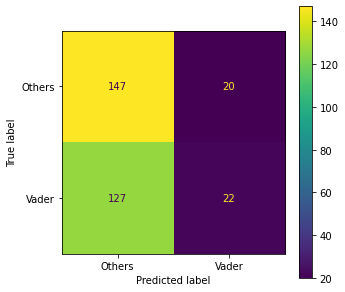

INFO:tensorflow:Assets written to: D:\University\Esami da Superare\Natural Language Processing\BarneyBot\BarneyBot\Data\Characters\Vader\vader_classifier_1\assets


In [6]:
metric = BBMetric.load_metric("semantic classifier")

metric.train(character='Vader', character_dict=character_dict, source_dict=source_dict, random_state=random_state,
             base_folder=base_folder, n_shuffles=10, from_saved_embeddings=True, shutdown_at_end=False, epochs=1)

In [2]:
metric = BBMetric.load_metric("semantic classifier")

print(metric.compute(character='Vader', character_dict=character_dict, base_folder=base_folder, from_n_epochs='last',
               sentences=["Hi!", "How are you?", "I hate you."]))
print(metric.compute(character='Vader', character_dict=character_dict, base_folder=base_folder, from_n_epochs='last',
               sentences=["Come to the dark side!", "I will kill you!",
                          "Luke, I am your father."]))

vader_classifier_1000
{'score': 0.11011249}
vader_classifier_1000
{'score': 0.5154482}


In [7]:
metric = BBMetric.load_metric("bleu")

print(metric.compute(predictions=sentences1, references=sentences2))

{'score': 0.0}


In [8]:
metric = BBMetric.load_metric("rouge l")

print(metric.compute(predictions=sentences1, references=sentences2))

{'score': 0.6666666666666666}


In [4]:
metric = BBMetric.load_metric("semantic similarity")

print(metric.compute(sentences_a=sentences1, sentences_b=sentences2))

{'scores': array([0.03812046, 0.9504694 ], dtype=float32)}


In [2]:
metric = BBMetric.load_metric("emotion")

print(metric.compute(sentences=sentences1))

{'scores': [0.6401270031929016, 0.36308011412620544], 'labels': ['joy', 'anger']}


In [3]:
metric = BBMetric.load_metric("semantic answer similarity")

print(metric.compute(predictions=sentences1, references=sentences2))

{'scores': array([0.0881714, 1.       ], dtype=float32)}


In [2]:
metric = BBMetric.load_metric("perplexity")

print(metric.compute(model=model, tokenizer=tokenizer, sentences=sentences1, stride=2)) # Stride is optional, defaults to 64

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.03it/s]

{'score': 118088.06238195905}


In [3]:
metric = BBMetric.load_metric("human - coherence")

metric.train(model=model, tokenizer=tokenizer,
             filepath=os.path.join(os.getcwd(), "Datasets", "Characters", "Default", "humancoherence.csv"),
             length=2)
metric.compute(filepath=os.path.join(os.getcwd(), "Datasets", "Characters", "Default", "humancoherence.csv"))

>> User:Hello!
DialoGPT: Hi!
>> User:I hate you.
DialoGPT: I hate you
How do you rate this conversation (0 to 5)? 2


{'score': 0.4}

In [2]:
metric = BBMetric.load_metric("human - consistency")

metric.train(model=model, tokenizer=tokenizer,
             filepath=os.path.join(os.getcwd(), "Datasets", "Characters", "Default", "humanconsistency.csv"))
metric.compute(filepath=os.path.join(os.getcwd(), "Datasets", "Characters", "Default", "humanconsistency.csv"))

Question: Who are you?
DialoGPT: I'm here
Question: What is your name?
DialoGPT: I'm in.
Question: What is your job?
DialoGPT: I'm a software engineer.
Question: Where do you live?
DialoGPT: I'm in the US and I've never heard of this.
How do you rate these answers (0 to 5)? 4


{'score': 0.8}

In [4]:
metric = BBMetric.load_metric("human - style")

metric.train(model=model, tokenizer=tokenizer,
             filepath=os.path.join(os.getcwd(), "Datasets", "Characters", "Default", "humanstyle.csv"),
             questions=["What are you wearing?", "Legendary"])
metric.compute(filepath=os.path.join(os.getcwd(), "Datasets", "Characters", "Default", "humanstyle.csv"))

Question: What are you wearing?
DialoGPT: I'm wearing a shirt.
Question: Legendary
DialoGPT: What is this? A crossover episode?
How do you rate these answers (0 to 5)? 1.5
Invalid score! Must be a single integer between 0 and 5!
How do you rate these answers (0 to 5)? 2


{'score': 0.4}

In [8]:
metric = BBMetric.load_metric("distinct")
metric.compute(sentences=sentences1, ngram_size=5)

{'score': 0.07352941176470588}